In [1]:
import pandas as pd
import numpy as np

### 0. load data with pd.read_csv()

In [2]:
data = pd.read_csv(r"C:\Users\s.goodroe\Dropbox\PhD\Teaching\radon_example\data\radon.csv")

### 1. view the data and column labels with data / data.head() and data.columns()

In [3]:
data.columns

Index(['Unnamed: 0', 'idnum', 'state', 'state2', 'stfips', 'zip', 'region',
       'typebldg', 'floor', 'room', 'basement', 'windoor', 'rep', 'stratum',
       'wave', 'starttm', 'stoptm', 'startdt', 'stopdt', 'activity', 'pcterr',
       'adjwt', 'dupflag', 'zipflag', 'cntyfips', 'county', 'fips', 'Uppm',
       'county_code', 'log_radon'],
      dtype='object')

In [4]:
data.head()

,Unnamed: 0,idnum,state,state2,stfips,zip,region,typebldg,floor,room,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


# a. interested in whether location by county + having a basement (y/n) predicts radon levels

In [5]:
#look at the data for basement (binary yes or no)
data.basement.head()

0    N
1    Y
2    Y
3    Y
4    Y
Name: basement, dtype: object

### 1. recode basement data to 1 and 0 (basement, no basement)

In [8]:
data.basement = data.basement.replace({'N':0, 'Y':1})

In [ ]:
## view data for basement and check that these values have been replaced

### 2. plot histogram of log_radon across counties

In [38]:
import matplotlib.pyplot as plt
import scipy.stats as scipy

In [53]:
## make the number of bins = the number of unique values in county_code (number of counties)
data.county_code.nunique()

85

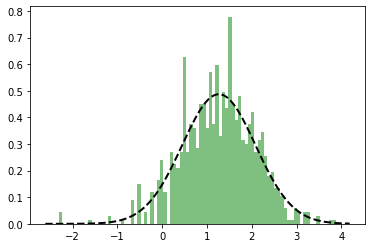

In [54]:
mu, std = norm.fit(data.log_radon)

# Plot the histogram.
plt.hist(data.log_radon, bins=85, density=True, alpha=0.5, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k--', linewidth=2)

plt.show()

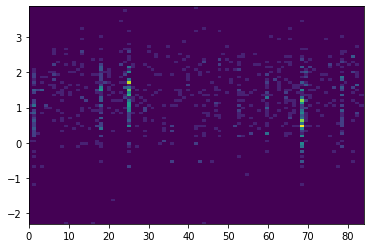

In [62]:
fig = plt.hist2d(data.county_code,data.log_radon,bins = 85,density = True)
plt.show() ## appears that some counties have more radon compared to others 

### 3. deal with empty cells in data.basement and plot boxplot by basement code

In [71]:
## replace empty cells with nan 
data.basement = data.basement.replace({' ': np.nan})

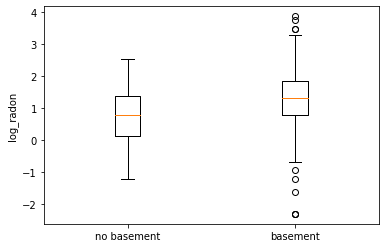

In [102]:
## plot the spread of log_radon for no basement versus basement in a box plot
## label x axis with 'no basement'/'basement' and y axis with 'log_radon'
test = [data.log_radon.where(data.basement == 0).dropna(),data.log_radon.where(data.basement == 1).dropna()]
labels = ['no basement','basement']
fig = plt.boxplot(test,labels = labels)
plt.ylabel('log_radon')
plt.show()

### 4. find the R2 and probability for a linear regression with county code and basement as equal regressors

In [104]:
import statsmodels.api as sm

In [108]:
copy = data.dropna()
x = copy[['county_code','basement']]
y = copy.log_radon

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
x = sm.add_constant(x,has_constant = 'add')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_radon   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              998.4
Date:                Mon, 03 Feb 2020   Prob (F-statistic):                   1.22e-226
Time:                        10:36:14   Log-Likelihood:                         -1084.5
No. Observations:                 878   AIC:                                      2173.
Df Residuals:                     876   BIC:                                      2183.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
county_code     0.0023      0.001      2.242      0.025       0.000       0.004
basement        1.2017      0.052     22.957      0.000       1.099       1.304
==============================================================================
Omnibus:                       27.302   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.338
Skew:                          -0.260   Prob(JB):                     3.88e-10
Kurtosis:                       3.956   Cond. No.                         92.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
## what can you interpret from the output?

### 5/0. try: mixed linear model with county code as a grouping variable 

In [110]:
import statsmodels.formula.api as smf

In [133]:
d = copy
md = smf.mixedlm('log_radon ~ basement',d,groups = d['county_code'])
mdf = md.fit()
predictions = mdf.predict(d['basement'])
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: log_radon 
No. Observations: 878     Method:             REML      
No. Groups:       85      Scale:              0.5694    
Min. group size:  1       Likelihood:         -1032.4261
Max. group size:  113     Converged:          Yes       
Mean group size:  10.3                                  
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   0.851     0.109  7.835  0.000   0.638   1.063
basement    0.543     0.106  5.124  0.000   0.335   0.751
Group Var   0.088     0.036                              
========================================================

"""

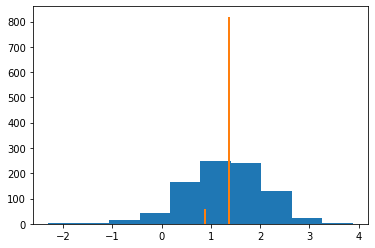

In [136]:
fig = plt.hist(d['log_radon'])
fig2 = plt.hist(predictions)